In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:\\Users\\Sauraj (Work mode)\\Desktop\\train.csv', index_col = 0)
df.dropna(how = 'any')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [2]:
df.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
a = np.array(df.Pclass)
b = np.array(df.Fare)
a.shape

(891,)

In [84]:

b = b.reshape(b.shape[0], -1)
b.shape

(891, 1)

In [79]:
from sklearn.neighbors import KNeighborsClassifier as kk

neighbor = kk(n_neighbors = 1)
print(neighbor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [85]:
neighbor.fit(b, a)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [88]:
neighbor.predict([[24]])

array([2], dtype=int64)

In [103]:
neighbor = kk(n_neighbors = 1)
print(neighbor)
neighbor.fit(b, a)
neighbor.predict([[1]])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


array([3], dtype=int64)

In [104]:
pred_value = neighbor.predict(b)

In [105]:
from sklearn import metrics
print(metrics.accuracy_score(a, pred_value))

0.9764309764309764


In [92]:
new_range = list(range(1, 101))
new_scores = []
for new in new_range:
    alpha = kk(n_neighbors = new)
    alpha.fit(b, a)
    pred_value = neighbor.predict(b)
    new_scores.append(metrics.accuracy_score(a, pred_value))
    

Text(0,0.5,'Testing accuracy')

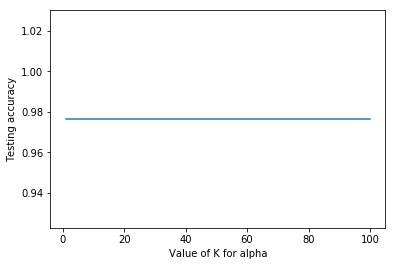

In [93]:
plt.plot(new_range, new_scores)
plt.xlabel('Value of K for alpha')
plt.ylabel('Testing accuracy')

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(b, a)
lr.predict(a)
new = lr.predict([[24.50]])
new

C:\Users\Sauraj (Work mode)\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3], dtype=int64)

#Train/Test Split


In [122]:
print(b.shape)
print(a.shape)

(891, 1)
(891,)


In [126]:
#Step 1: Split b and a into training and testing models
from sklearn.cross_validation import train_test_split as tts
b_train, b_test, a_train, a_test = tts(b, a, test_size = 0.4, random_state = 4)

In [131]:
#Print the shape of the new objects
print(b_train.shape)
print(b_test.shape)
print(a_train.shape)
print(a_test.shape)

(534, 1)
(357, 1)
(534,)
(357,)


In [154]:
#Step 2: Train the model on the training set 
neighbor.fit(b_train, a_train)
#Make predictions on the testing set
new_pred = neighbor.predict(b_test)
print(metrics.accuracy_score(a_test, new_pred))

0.9495798319327731


In [248]:
#Try K = 1 through K= 25 and plot testing accuracy
k_range = list(range(1, 26))
scores = []

for k in k_range:
    knn = kk(n_neighbors = k)#Define the variable 'knn' and pass the function
    knn.fit(b_train, a_train)
    new_pred = knn.predict(b_test)
    scores.append(metrics.accuracy_score(a_test, new_pred))

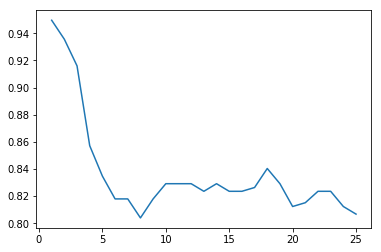

In [249]:
#Plot the accuracy graph
import matplotlib.pyplot as plt

plt.plot(k_range, scores)